In [1]:
from MCS_similarity import *
import pandas as pd

df = pd.read_csv('USPTO_mutations.csv')
all_smiles = df['molecule'].tolist()
all_mutations = df['mutations'].tolist()

In [2]:
# df = pd.read_csv('outputs/hybrid_Sims.csv')
# molecules = df['smiles'].tolist()
# idxs = [i for i, smiles in enumerate(all_smiles) if smiles in molecules]
idxs = np.random.choice(df.index.tolist(), 200)
len(idxs)

200

In [3]:
# finding the most similar molecule in dataset
import math
from tqdm import tqdm

Tam_Sims = {}
rdkit_MCS_Sims = {}
fast_MCS_Sims = {}
hybrid_Sims = {}

for i in idxs:
    smi1 = all_smiles[i]
    mol1 = Chem.MolFromSmiles(smi1)
    print (i, smi1)
    recorder1 = sim_recorder(smi1)
    recorder2 = sim_recorder(smi1)
    recorder3 = sim_recorder(smi1)
    recorder4 = sim_recorder(smi1)
    mutations = eval(all_mutations[i])
    for smi2 in mutations:
        mol2 = Chem.MolFromSmiles(smi2)
        t1, sim1 = Tam_Sim(mol1, mol2)
        t2, sim2 = rdkit_MCS_Sim(mol1, mol2)
        t3, sim3 = fast_MCS_Sim(mol1, mol2)
        t4 = t1+t3
        sim4 = math.sqrt(sim1*sim3) # hybrid similarity
        recorder1.record(t1, sim1)
        recorder2.record(t2, sim2)
        recorder3.record(t3, sim3)
        recorder4.record(t4, sim4)
    Tam_Sims[i] = recorder1.summerize(mutations)
    rdkit_MCS_Sims[i] = recorder2.summerize(mutations)
    fast_MCS_Sims[i] = recorder3.summerize(mutations)
    hybrid_Sims[i] = recorder4.summerize(mutations)

7161 O=C(Nc1ccc(-c2ccccc2)cc1C(=O)O)OCc1ccc(-c2ccccc2)cc1
484 O=[N+]([O-])c1ccc(N(Cc2ccc3nonc3c2)n2cncn2)cc1
35258 Cc1cnc(N2CCN(C(=O)c3ccc(Br)cc3[N+](=O)[O-])CC2)c(C)c1
44053 CC(C)(NC(=O)Cn1nc(-c2ccc(Cl)cc2)n(C2CC2)c1=O)c1cccc(C(F)(F)F)c1
16617 CN(C(=O)OC(C)(C)C)c1cc(Oc2ccc(C34CC5CC(CC(C5)C3)C4)cc2)ccc1NC(=O)COc1ccc(CC2SC(=O)NC2=O)cc1
5349 CC(C)N(CCc1ccc(C(=O)N2CCN(C(=O)OC(C)(C)C)CC2)cc1)C(C)C
19502 COC(=O)CCCCc1cc2c(o1)C[C@@H](OC1CCCCO1)[C@@H]2C=O
38702 CC(C)(C)OC(=O)NC1=NC(C)(c2cccc(-c3cncc(C#N)c3)c2)COC1
44726 Oc1cccc(-c2nc3c(NC4CCCC4)cccn3c2-c2ccnc(NC3CCCC3)n2)c1
7293 C[C@](O)(C(=O)Nc1cccc2c1C(=O)c1sccc1CS2)C(F)(F)F
8846 COC(=O)C(CC(C)C)c1cc(-c2cc(F)cc(C(F)(F)F)c2)cc(-c2cc(C(F)(F)F)cc(C(F)(F)F)c2)c1
2022 COC(=O)[C@@H]1C[C@@H](Oc2nc(-c3ccccn3)nc3ccsc23)CN1C(=O)OC(C)(C)C
27107 CC(=O)Nc1ccc(C)c2c1C(=O)CCN2CCN
45603 Cn1c(CCN2CCC(COc3ccccc3F)CC2)cncc1=O
47191 CCNc1ccccc1
39263 Nc1ncnn2c([C@@H]3CCCNC3)cc(-c3ccc4cn(Cc5ccccc5)nc4c3)c12
22787 COC(=O)c1cccc(CS(=O)(=O)N[C@@H](C(=O)N[C@@H](CC(

42823 CC(C)C[C@@H](C(=O)O)N(C)C(=O)CC1(c2ccccc2)C(=O)Oc2ccc(Cl)cc21
41231 C[C@H](NC[C@@H](O)[C@H](Cc1ccccc1)NC(=O)c1cc(N)cc(N2CCCC2=O)c1)C(=O)NC1CCCCC1
12142 CS(=O)c1cc(N2CCC3(CC2)OCCO3)nc2sc(C(N)=O)c(N)c12
39303 CN1C(=O)NC(=O)C1=Cc1cnn2ccc(Nc3cccc(Cl)c3)nc12
47643 Nc1ccc2c(c1)CC(=O)c1ccccc1S2
1627 CCc1cnc(NCCc2ccc(OC)c(Br)c2)nc1
32311 CCCC(C(=O)O)c1c(C)nc2cc(C(C)(C)C)nn2c1-c1ccc(Cl)cc1OC
23948 O=CNc1nc(Cl)cc(Cl)n1
47690 CC(C)(C)OC(=O)[C@@H]1C[C@H](COc2cccc(Cl)c2)CN1C(=O)OC(C)(C)C
7576 N#Cc1cc(-c2cc(C(=O)O)sc2-c2cc(F)cc(Cl)c2)ccc1F
16456 CCOC(=O)c1cccc(-c2cc3cc(OC)ccc3s2)c1
32271 c1ccc(CN(Cc2ccccc2)CC2CO2)cc1
6141 Nc1nc2cc(OS(=O)(=O)c3c(Cl)cccc3Cl)ccc2[nH]1
45643 CSc1ncc2cc(-c3ccccc3C)c(=O)n([C@H]3CCNC3)c2n1
12926 O=[N+]([O-])c1ccc2c(c1)C(c1cccc[n+]1[O-])=CC(C(F)(F)F)(C(F)(F)F)O2
43256 COCOc1cc(COCc2ccccc2)c(C=O)c(OCOC)c1
32028 CC[C@H](C)Nc1cc(C(=O)OC)cc(S(=O)(=O)C(C)C)n1
11229 CC(C)(C)OC(=O)N1CC(C(=O)N2CCC(C#N)(Cc3ccc(F)nc3)CC2)Oc2cc(O)c(Cl)cc21
5134 O=C(c1cnc2ccc(-c3cc(Cl)c(O)c(Cl)c3

In [ ]:
import numpy as np

# Tam_Sims, rdkit_MCS_Sims, fast_MCS_Sims, hybrid_Sims

def get_average_time(d):
    return np.mean([v[0] for v in d.values()])

get_average_time(rdkit_MCS_Sims), get_average_time(fast_MCS_Sims)

In [10]:
len(fast_MCS_Sims)

199

In [5]:
smiles_list = [all_smiles[i] for i in idxs]

In [11]:
output_dict = {'Tam': Tam_Sims, 'fast_MCS': fast_MCS_Sims, 'rdkit_MCS':rdkit_MCS_Sims, 'hybrid': hybrid_Sims}
for k, v in output_dict.items():
    print (k)
    df = pd.DataFrame.from_dict(v, orient = 'index')
    df.columns = ['time', 'similar_mols']
    df['smiles'] = [all_smiles[i] for i in v.keys()]
    df.to_csv('outputs/%s_Mutations2.csv' % k)

Tam
fast_MCS
rdkit_MCS
hybrid


In [ ]:
df = pd.DataFrame.from_dict(hybrid_Sims, orient = 'index')
df.columns = ['time', 'similar_mols']
df['smiles'] = smiles_list
# df['time'] = [tt in enumerate(df['time'])]
df.to_csv('hybrid_Mutations.csv')
df

In [95]:
def search_frags_with_atoms2(mol, atoms_to_use):
    if len(atoms_to_use) == 0:
        return [[]]
    graph = {atom.GetIdx(): [n.GetIdx() for n in atom.GetNeighbors()] for atom in mol.GetAtoms()}
    expanded_atoms_to_use1 = set(atoms_to_use)
    [expanded_atoms_to_use1.update(graph[idx]) for idx in atoms_to_use]
    expanded_atoms_to_use2 = expanded_atoms_to_use1.copy()
    [expanded_atoms_to_use2.update(graph[idx]) for idx in expanded_atoms_to_use1]
    subgraphs = search_subgraphs(graph, expanded_atoms_to_use2)
    return subgraphs

def fast_MCS_Sim2(mol1, mol2, radius = 1, print_frag = False):
    info1, info2 = {}, {}
    fp1 = AllChem.GetMorganFingerprint(mol1, radius, bitInfo=info1)
    fp2 = AllChem.GetMorganFingerprint(mol2, radius, bitInfo=info2)
    common_atoms1, common_atoms2 = [], []
    for fp, irs in info1.items():
        if fp in info2 and irs[0][1] == radius:
            common_atoms1 += [ir[0] for ir in irs]
            common_atoms2 += [ir[0] for ir in info2[fp]]
    print (common_atoms2) 
    frags1, frags2 = search_frags_with_atoms(mol1, common_atoms1), search_frags_with_atoms(mol2, common_atoms2)
    print (frags1, frags2)
    if print_frag: print (frags1, frags2)
    max_frag1, max_frag2 = max([len(frag) for frag in frags1]), max([len(frag) for frag in frags2])
    print (max_frag1, max_frag2)
    return min([max_frag1, max_frag2])

def rdkit_MCS_Sim2(mol1, mol2):
    res = rdFMCS.FindMCS([mol1, mol2], ringMatchesRingOnly=True,completeRingsOnly=True)
    print (res.smartsString)
    return res.numAtoms

i = 198
i = idxs[i]
smi1 = all_smiles[i]
print (smi1)
mol1 = Chem.MolFromSmiles(smi1)
mutations = eval(all_mutations[i])
smi2 = mutations[0]
mol2 = Chem.MolFromSmiles(smi2)    
print (smi2, fast_MCS_Sim2(mol1, mol2), rdkit_MCS_Sim2(mol1, mol2))

Cc1cccc2nc(SCc3ccc(C(=O)c4ccc(OCCCN(C)C)cc4)cc3)n(C)c(=O)c12
[36, 3, 0, 25, 9, 2, 4, 11, 12, 17, 18, 29, 31, 32, 30, 6, 8, 15, 23, 24, 7, 35, 33, 13, 16, 26, 1, 5, 14, 34, 27, 28, 37, 10]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 27, 28, 29, 30, 31, 32, 33, 34, 35], [21, 22, 23, 24, 25, 26]] [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 29, 30, 31, 32, 33, 34, 35, 36, 37], [22, 23, 24, 25, 26, 27, 28]]
29 29
[#6&!R]-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]2:&@[#6&R]:&@1:&@[#6&R](:&@[#7&R](:&@[#6&R](:&@[#7&R]:&@2)-&!@[#16&!R]-&!@[#6&!R]-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R](:&@[#6&R]:&@[#6&R]:&@1)-&!@[#6&!R](=&!@[#8&!R])-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@1)-&!@[#6&!R])=&!@[#8&!R]
Cc1cccc2nc(SCc3ccc(C(=O)c4ccc(C=NCCCCN(C)C)cc4)cc3)n(C)c(=O)c12 29 29


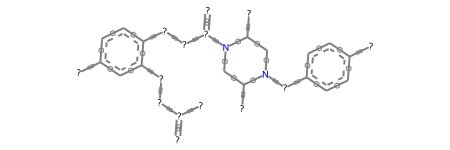

In [96]:
Chem.MolFromSmarts('[#6&!R]-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R](:&@[#6&R](:&@[#6&R]:&@1)-&!@[#8&!R]-&!@[#6&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#8&!R])-&!@[#6&!R]-&!@[#6&!R]-&!@[#6&!R](=&!@[#8&!R])-&!@[#7&R]1-&@[#6&R]-&@[#6&R](-&!@[#6&!R])-&@[#7&R](-&@[#6&R]-&@[#6&R]-&@1-&!@[#6&!R])-&!@[#6&!R]-&!@[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R](:&@[#6&R]:&@[#6&R]:&@1)-&!@[#9&!R]')

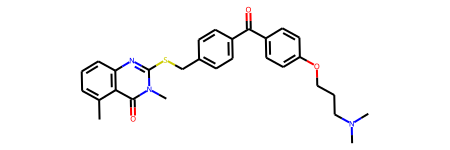

In [97]:
Chem.MolFromSmiles(smi1)

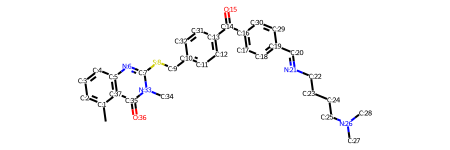

In [98]:
m = Chem.MolFromSmiles(smi2)
[atom.SetAtomMapNum(atom.GetIdx()) for atom in m.GetAtoms()]
m